In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#시스템 보정
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

# artist가 '코케'인 데이터의 title, artist 재정의
def revise_koke(df) :
    j=0
    for i in range(727) :
        if df['artist/s'][i] == '코케' :
            #print('koke')
            df['title'][i] = new_title[j][0]
            df['artist/s'][i] = new_title[j][1]
            j=j+1

#가수의 yy년에 낸 히트곡의 개수를 반환하는 함수
def count_num(yy, L_artist) :
    num_of_song=[]
    for i in range(len(artist)) :
        if artist[i] in L_artist :
            num_of_song.append(L_artist.count(artist[i]))
        else :
            num_of_song.append(0)
    return num_of_song



In [14]:

#그래프 표현
def show_graph(name):
    S_artist = my_df.loc[name]
    L_key = S_artist.keys().tolist()
    L_artist = S_artist.values.tolist()

    plt.figure(figsize=(18,4))
    plt.title('2000~2021 {0}의 히트곡 개수'.format(name))
    plt.legend(loc=3)
    plt.xticks(L_key)

    plt.plot(L_key, L_artist, marker='o', color = 'blue', label=name)
    
    plt.show()

def set_data(name):
    S_artist = my_df.loc[name]
    L_artist = S_artist.values.tolist()
    return L_artist

#다중 그래프 표현
def show_graph2():
    name=input('가수 이름 입력: ')
             
    S_artist = my_df.loc[name]
    L_key = S_artist.keys().tolist()
    L_artist = S_artist.values.tolist()

    plt.figure(figsize=(18,4))
    plt.title('히트곡 개수 비교')
    
    plt.xticks(L_key)

    plt.plot(L_key, L_artist, marker='o', color = 'blue', label=name)

    while True:
        reply = input('추가하시겠습니까? Y/N :')
        if reply == 'N' :
            break
        elif reply == 'Y' :
            name=input('가수 이름 입력: ')
            plt.plot(L_key, set_data(name), marker='o', color = 'red', label=name)
        else :
           print('Y/N 중에 입력하세요')

    plt.legend(loc=3)
    plt.show()

#파이차트 그리기
def show_pie_graph(name):
    S_artist = my_df.loc[name]
    L_key = S_artist.keys().tolist()
    L_artist = S_artist.values.tolist()

    plt.axis('equal')

    plt.pie(L_artist, labels=L_key, autopct='%.1f%%')
    plt.legend()    
    plt.show()

In [7]:
#CSV 파일 로드
df=[]
for i in range(2000, 2021) :
    df.append(pd.read_csv("C:/Users/q/Desktop/archive/KPopHits"+str(i)+".csv", encoding='utf-8'))
    df[i-2000]['year']=i
concat_df = pd.concat(df, ignore_index=True)

In [8]:
#print(concat_df['title'][concat_df['artist/s'] == '코케'])  #<<확인용

#artist가 '코케'인 데이터 title 열 보정
new_title=[]
S_koke = concat_df['title'][concat_df['artist/s'] == '코케'] #가수이름이 koke인 놈들 시리즈
L_koke = S_koke.values.tolist() #가수이름이 koke인 놈들 리스트
for i in range(len(L_koke)) :
    new_title.append(L_koke[i].split(' : Originally Performed By ')) #1차 split 완료
    new_title[i][1] = new_title[i][1].split(' ')[0] #2차 split 완료

# '코케'인 데이터의 title, artist 재정의
revise_koke(concat_df)

#print(concat_df['title'][concat_df['artist/s'] == '오렌지캬라멜'])  #<<확인용

C:\Users\q\AppData\Local\Temp/ipykernel_16040/2372054666.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'][i] = new_title[j][0]
C:\Users\q\AppData\Local\Temp/ipykernel_16040/2372054666.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist/s'][i] = new_title[j][1]


In [9]:
# i 해의 아티스트 리스트 (콜라보 보정 완료)
artist_of_years={}
for i in range(2000, 2021) :
    artist_of_year=[]
    S_year = concat_df['artist/s'][concat_df['year'] == i] #i해의 아티스트 시리즈
    L_year = S_year.values.tolist() #i해의 아티스트 리스트
    for j in range(len(L_year)) :
        artist_of_year.extend(L_year[j].split(', '))
    #print(i,': ', artist_of_year) # 특정 해에 히트곡을 낸 가수들의 리스트
    artist_of_years[i] = artist_of_year #딕셔너리 형태로 저장

#print(artist_of_years)  <<확인용 


In [10]:
#unique한 artist list 생성
def set_artist(L1) :
    for i in range(len(L1)) :
        if L1[i] not in artist :
            artist.append(L1[i])

artist=[]
for i in range(2000,2021) :
    set_artist(artist_of_years[i])

#print(artist) #<<확인용

In [11]:
#내 데이터프레임 생성하기
my_dic={}
for i in range(2000, 2021) :
    my_dic[i] = count_num(i, artist_of_years[i])

my_col = list(range(2000,2021))

my_df = pd.DataFrame(my_dic, columns = my_col, index=artist)
print(my_df)  #<<확인용

                 2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
S.E.S.              1     1     1     0     0     0     0     0     0     0   
Paul Cherry         1     0     0     0     0     0     0     0     0     0   
Lena Park           1     0     1     0     0     0     0     0     0     0   
Jo Sung Mo          1     0     0     0     0     1     0     0     0     0   
조규만 Cho Kyu Man     1     0     0     0     0     0     0     0     0     0   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
GFRIEND             0     0     0     0     0     0     0     0     0     0   
YooA                0     0     0     0     0     0     0     0     0     0   
TREASURE            0     0     0     0     0     0     0     0     0     0   
Lovelyz             0     0     0     0     0     0     0     0     0     0   
3YE                 0     0     0     0     0     0     0     0     0     0   

                 ...  2011  2012  2013  2014  2015 

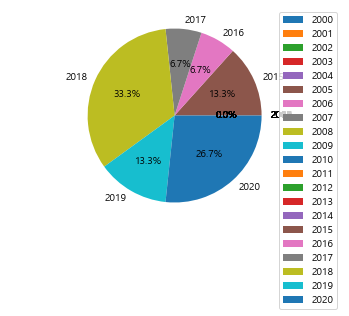

In [18]:
## 셋 중 하나만 써야함~~
"""
#특정 가수의 히트곡 개수 보기
name = input('가수 이름 입력: ')
show_graph(name)

#여러 가수의 히트곡 개수 비교
show_graph2()
"""
#특정 가수의 히트곡 연도 파이차트 보기
name = input('가수 이름 입력: ')
show_pie_graph(name)
